In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Summary Statistics

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations :-
    
1. The mean is more than median for all columns.
2. There is large difference between standard deviation and maximum for capital_gain, capital_loss .

# Exploring Target Variable

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
# As we have categorical values in Income column, so, this is a classification problem.

# Data Visualizations

To check missing values

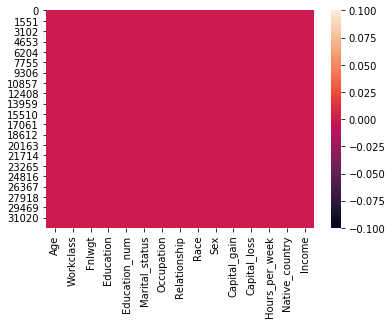

In [10]:
sns.heatmap(df.isnull())

Obsevations :-

1. The data has no missing values.

# Univariate Analysis

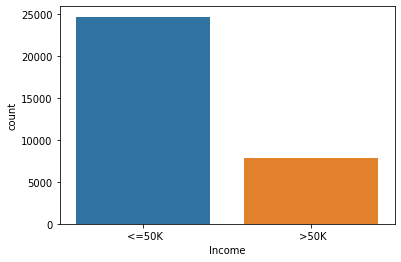

In [11]:
sns.countplot(df['Income'])

Observations :-

1. People who have their income less than and equal to fifty thousand dollars are present more in dataset.
2. This is a class imbalance problem.

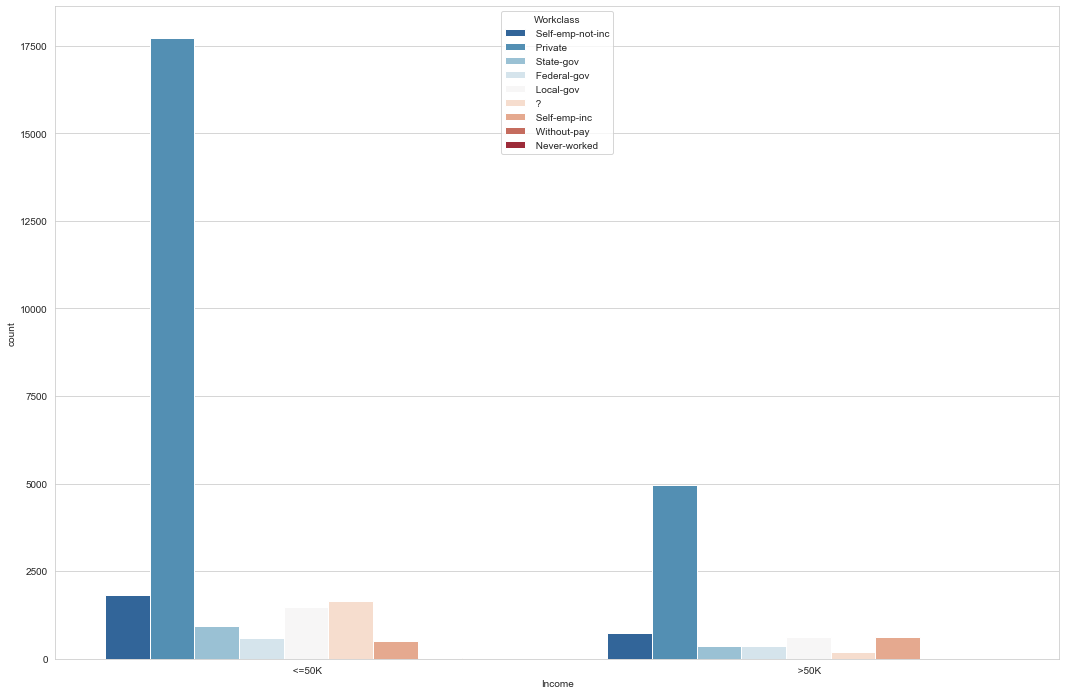

In [12]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Workclass',data=df,palette='RdBu_r')

Observations :-
    
1. Highest number of people in private department have income greater than and equal to 50k.
2. Lowest number of people in unknown department have income greater than and equal to 50k. 

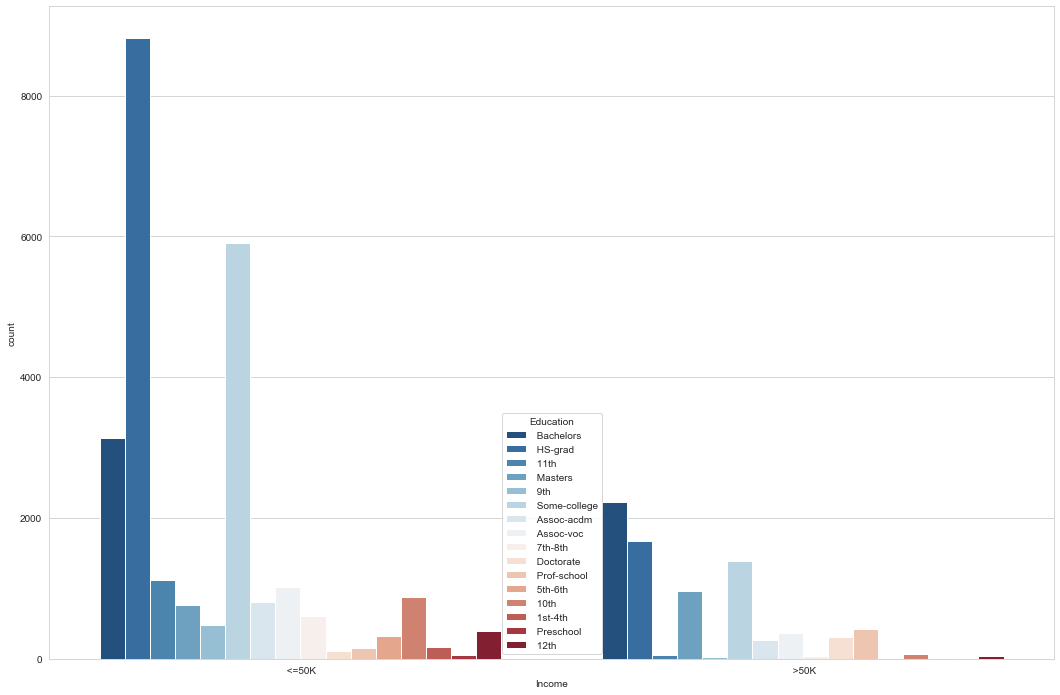

In [13]:
plt.figure(figsize=(18,12))
#plt.legend(loc="best")
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Education',data=df,palette='RdBu_r')

Observations :-
    
1. Highest number of bachelors have income greater than and equal to 50k.
2. Lowest number 0f 9th pass have income greater than and equal to 50k.
3. High number of HS-grad, Masters  and some - college people have income greater than and equal to 50k.
4. Very few number of 12th, 11th, 10th and 7th - 8th passed people have income greater than and equal to 50k.
5. 0 number of Preschool, 1st - 4th, and 5th - 6th passes people have income greater than and equal to 50k.

In [14]:
# We will drop the column of Education_num as it is formed by applying grouping on Education column.
df.drop('Education_num',axis=1,inplace=True)

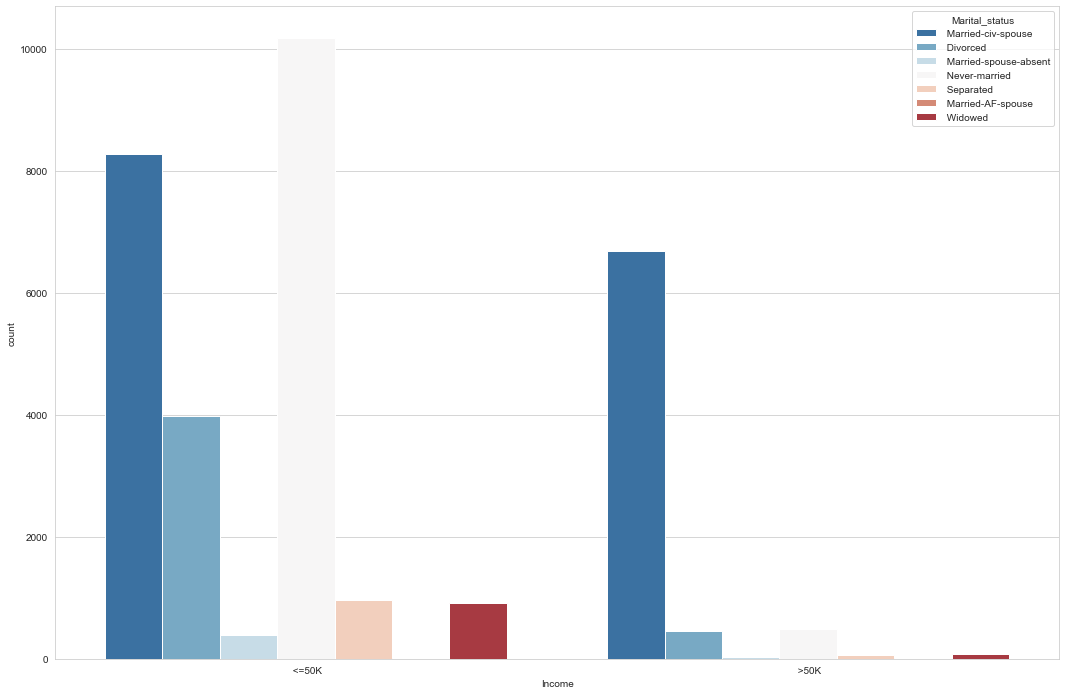

In [15]:
plt.figure(figsize=(18,12))
#plt.legend(loc="best")
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Marital_status',data=df,palette='RdBu_r')

Observations :-
    
1. Highest number of married people who have civilian spouse have income greater than and equal to 50k.
2. Lowest number of married people who have absent spouse have income greater than and equal to 50k.
3. High number of divorced and never married people have income greater than and equal to 50k.
4. Very few number of seperated and widowed people have income greater than and equal to 50k.
5. 0 number of people who have spouse in armed forces have income greater than and equal to 50k.

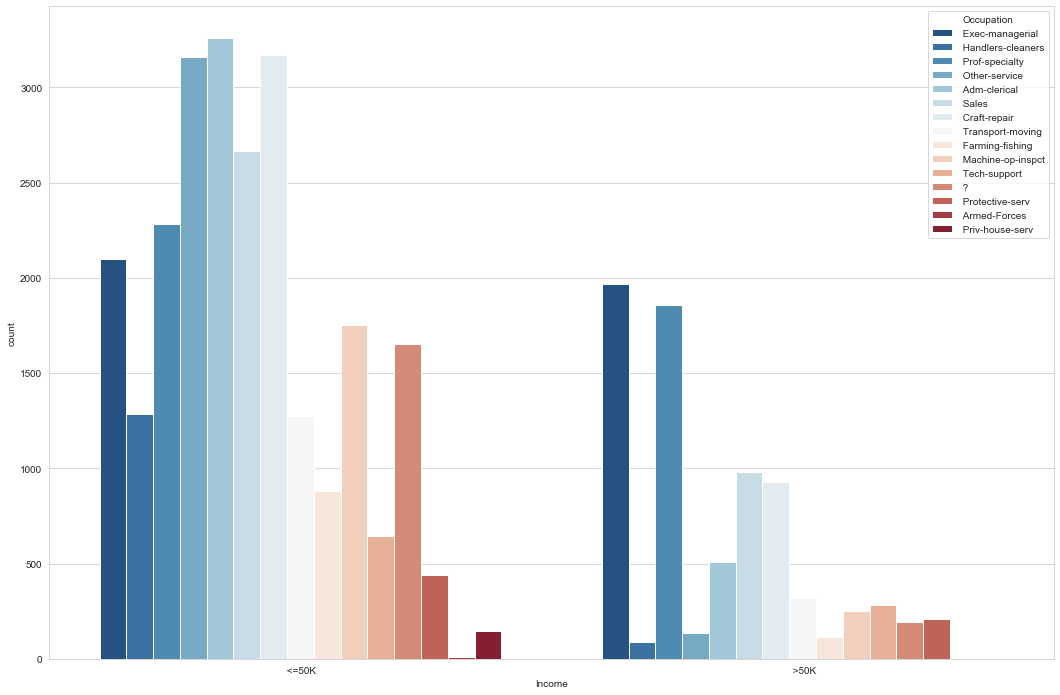

In [16]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Occupation',data=df,palette='RdBu_r')

Observations :-
    
1. Highest number of executive - managers have income greater than and equal to 50k.
2. Lowest number of handler cleaners have income greater than and equal to 50k.
3. High number of speciality professors, scalers and crafts repairer have income greater than and equal to 50k.
4. Very few number of people in other - services, farmer fishing and unkonwn services have income greater than and equal to 50k.
5. 0 number of people in armed forces and private house services have income greater than and equal to 50k.

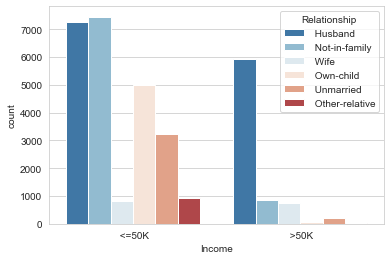

In [17]:
#plt.figure(figsize=(18,12))
#plt.legend(loc="best")
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Relationship',data=df,palette='RdBu_r')

Obsrvations :-
    
1. Highest number of earning people as husbands have income greater than and equal to 50k.
2. Lowest number of people who have their own child as an earning member have income greater than and equal to 50k.
3. High number of people who have no family have income greater than and equal to 50k.
4. Very few number of unmarried people have income greater than and equal to 50k.
5. 0 number of people who have their other relatives as an earning member have income greater than and equal to 50k.

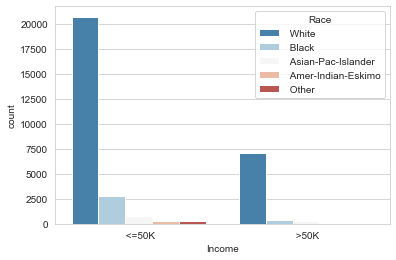

In [18]:
#plt.figure(figsize=(18,12))
#plt.legend(loc="best")
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Race',data=df,palette='RdBu_r')

Observations :-
    
1. Highest number of white people have income greater than and equal to 50k.
2. Lowest number of black people have income greater than and equal to 50k.
3. 0 number of Asian-Pac-Islander and Armer-Indian-Eskimo have income greater than and equal to 50k.

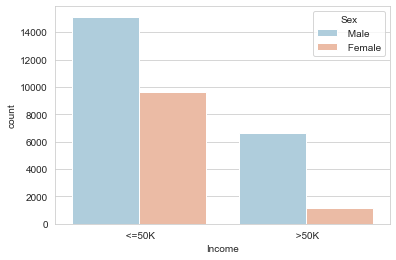

In [19]:
#plt.figure(figsize=(18,12))
#plt.legend(loc="best")
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Sex',data=df,palette='RdBu_r')

Observations :-
    
1. More number of males have income greater than and equal to 50k as compared to females.

In [20]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64":
        df_int_types.append(i)

In [21]:
df_int_types

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

In [22]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

In [23]:
df_str_types

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [24]:
for value in df_str_types:
    print(df[value].value_counts().sort_index())

 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1297
 Without-pay            14
Name: Workclass, dtype: int64
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5354
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: Education, dtype: int64
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10682
 Separated                 1025
 Widowed                    993
Name: Marital_status, dtype: int64
 ?                    1843
 Adm-clerical         3769
 Armed-Forces   

In [25]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts().sort_index())

0     1836
1      960
2     2093
3        7
4    22696
5     1116
6     2541
7     1297
8       14
Name: Workclass, dtype: int64
0       933
1      1175
2       433
3       168
4       333
5       646
6       514
7      1067
8      1382
9      5354
10      413
11    10501
12     1723
13       51
14      576
15     7291
Name: Education, dtype: int64
0     4443
1       23
2    14976
3      418
4    10682
5     1025
6      993
Name: Marital_status, dtype: int64
0     1843
1     3769
2        9
3     4099
4     4066
5      994
6     1370
7     2002
8     3295
9      149
10    4140
11     649
12    3650
13     928
14    1597
Name: Occupation, dtype: int64
0    13193
1     8304
2      981
3     5068
4     3446
5     1568
Name: Relationship, dtype: int64
0      311
1     1039
2     3124
3      271
4    27815
Name: Race, dtype: int64
0    10771
1    21789
Name: Sex, dtype: int64
0       583
1        19
2       121
3        75
4        59
5        95
6        70
7        28
8       106
9       

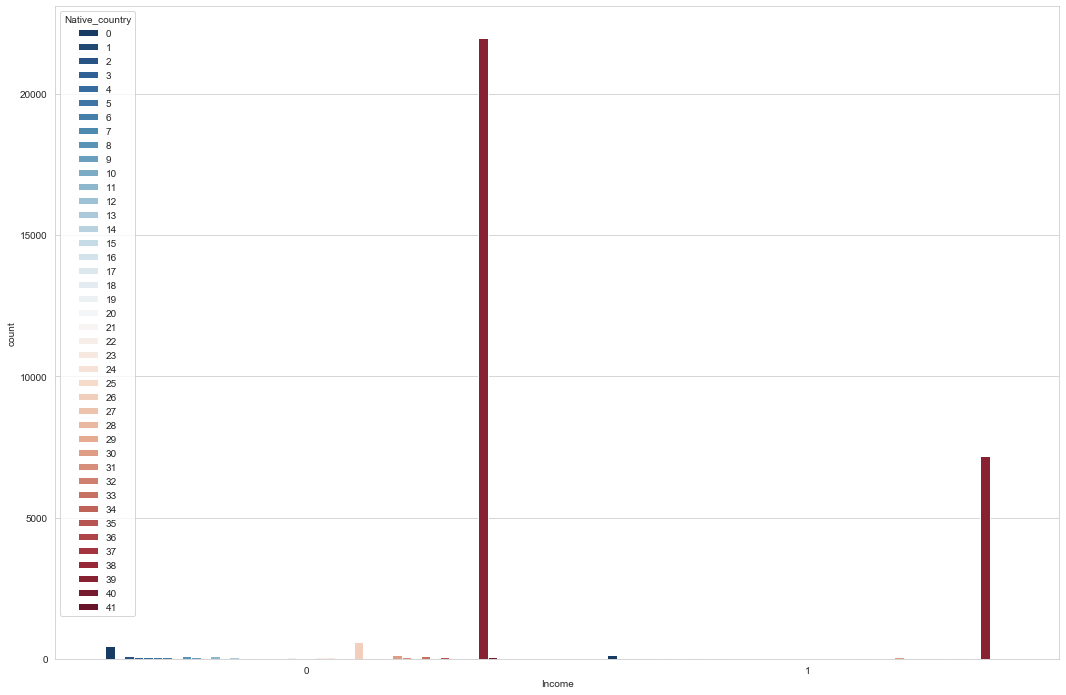

In [26]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Native_country',data=df,palette='RdBu_r')

Observations :-
    
1. Highest number of people in United States have income greater than and equal to 50k.
2. Lowest number of people in Scotland have income greater than and equal to 50k.
3. Less number of people in Cambodia have income greater than and equal to 50k.
4. Only United States, Scotland and Cambodia have income greater than and equal to 50k.

In [27]:
df_int_types=['Age', 'Fnlwgt','Hours_per_week']

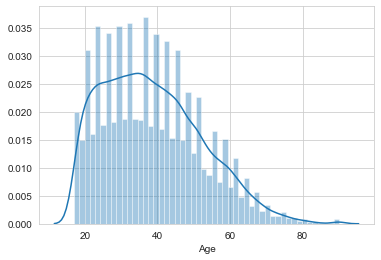

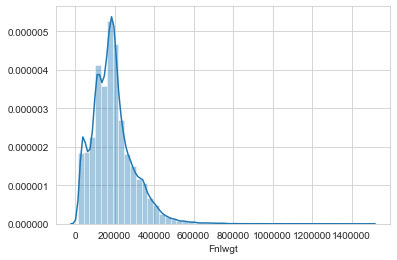

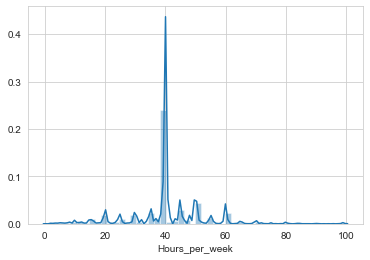

In [28]:
for i in df_int_types:
    sns.distplot(df[i])
    plt.show()


Observations :-
    
1. Age of people is majorly in the range of 20-50 according to census.
2. As per census, hours per week given by people for their work is majorly in the range of 38-42.
3. The weights on the Current Population Survey (CPS) files is majorly in the range of 200000-400000.

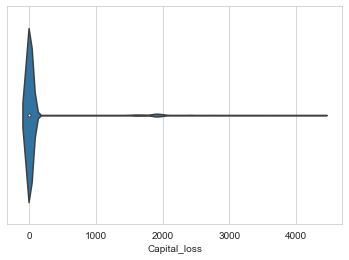

In [29]:
sns.violinplot(df['Capital_loss'])

Observations :-
    
1. The capital loss of people is majorly 0 as per census.
2. High number of people have capital loss in the range of 1500-2000.

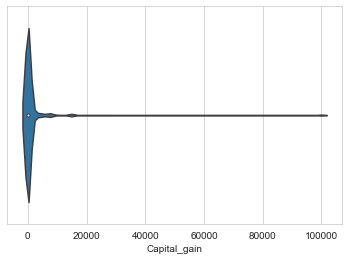

In [30]:
sns.violinplot(df['Capital_gain'])

Observations :-
    
1. The capital gain of people is majorly 0 as per census.
2. High number of people have capital gain in the range of 0-20000.

In [31]:
dfcorr=df.corr()
dfcorr

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.030047,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


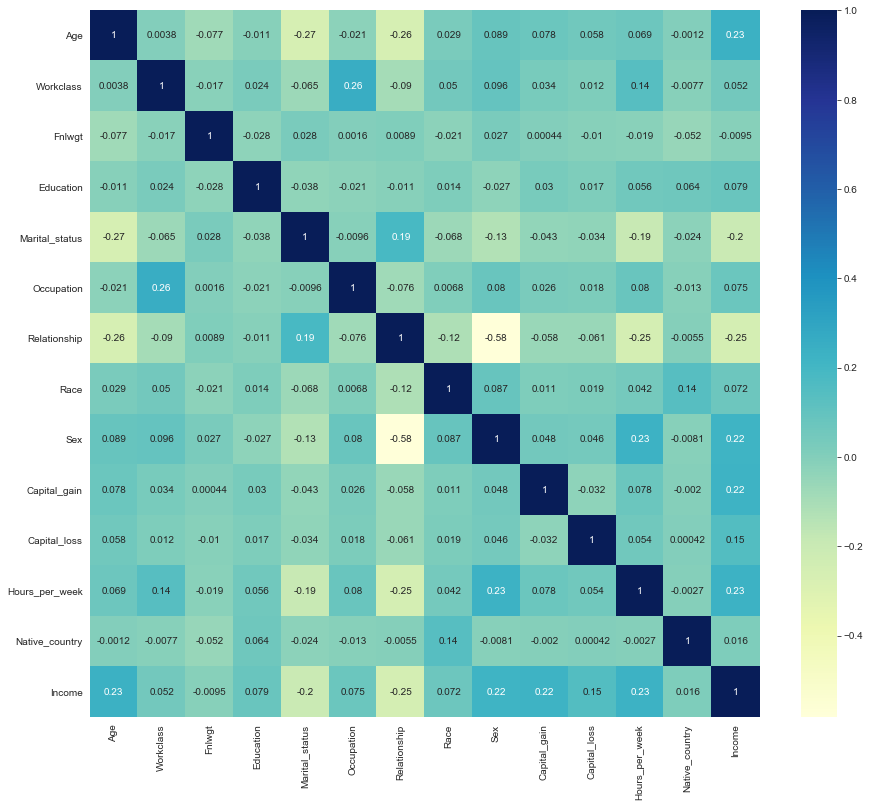

In [32]:
# Multivariate Analysis
plt.figure(figsize=(15,13))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

Observations :-
    
1. Income is highly positively correlated to Age.
2. Age is highly negatively correlated to Marital Status.
3. Marital Status is highly positively correlated to Relationship.
4. Marital Status is highly negatively correlated to Income

# Plotting Outliers

In [33]:
df.shape

(32560, 14)

Age                  AxesSubplot(0.125,0.125;0.0466867x0.755)
Workclass         AxesSubplot(0.181024,0.125;0.0466867x0.755)
Fnlwgt            AxesSubplot(0.237048,0.125;0.0466867x0.755)
Education         AxesSubplot(0.293072,0.125;0.0466867x0.755)
Marital_status    AxesSubplot(0.349096,0.125;0.0466867x0.755)
Occupation         AxesSubplot(0.40512,0.125;0.0466867x0.755)
Relationship      AxesSubplot(0.461145,0.125;0.0466867x0.755)
Race              AxesSubplot(0.517169,0.125;0.0466867x0.755)
Sex               AxesSubplot(0.573193,0.125;0.0466867x0.755)
Capital_gain      AxesSubplot(0.629217,0.125;0.0466867x0.755)
Capital_loss      AxesSubplot(0.685241,0.125;0.0466867x0.755)
Hours_per_week    AxesSubplot(0.741265,0.125;0.0466867x0.755)
Native_country    AxesSubplot(0.797289,0.125;0.0466867x0.755)
Income            AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

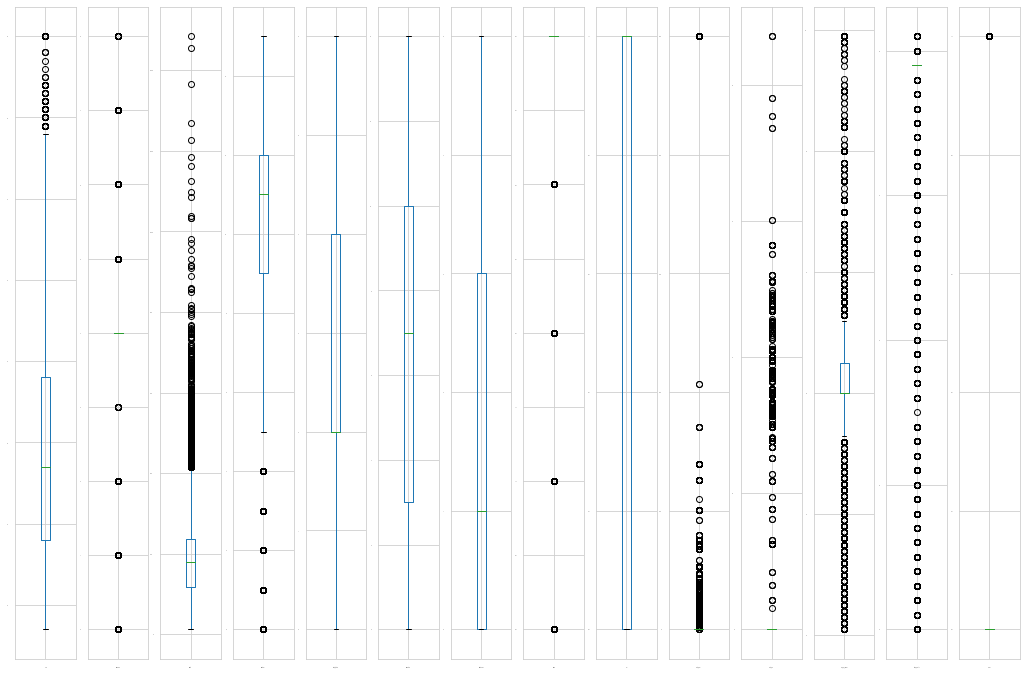

In [34]:
df.plot(kind='box',subplots=True,layout=(1,14),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Age, Workclass, Fnlwgt, Education, Race, Capital_gain, Capital_loss, Hours_per_week, Native_country
and Income have outliers.

In [35]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

# Removing Outliers

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [37]:
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [38]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [39]:
df_new=df[(z<3).all(axis=1)]

In [40]:
df_new.shape

(27561, 14)

In [41]:
df.shape

(32560, 14)

In [42]:
df=df_new

In [43]:
# 4999 rows are removed as outliers.

In [44]:
((32560-27561)/32560)*100

15.353194103194104

# To check Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8C7E6A0C8>,
      dtype=object)

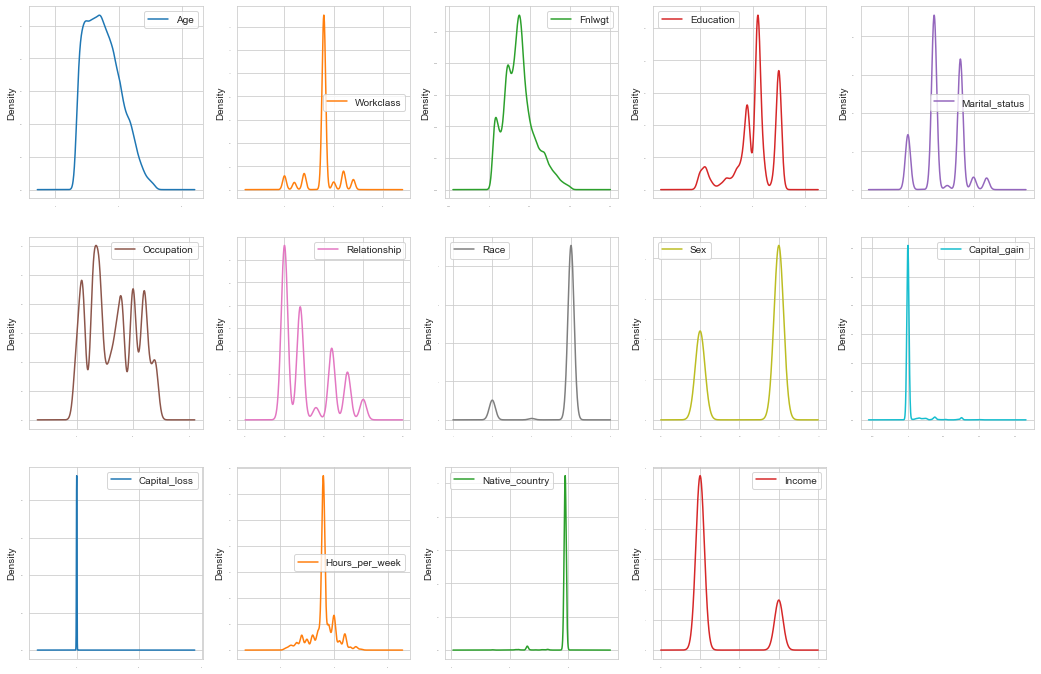

In [45]:
df.plot(kind='density',subplots=True,layout=(3,5),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Fnlwgt, Relationship, Capital_gain, Capital_loss and Income are right skewed.
2. Workclass, Education, Race, Sex and Native_country are left skewed. 

In [46]:
df.skew()

Age                0.481894
Workclass         -0.740966
Fnlwgt             0.624658
Education         -0.944964
Marital_status    -0.042647
Occupation         0.131546
Relationship       0.752376
Race              -2.589087
Sex               -0.687149
Capital_gain       4.946239
Capital_loss      29.402904
Hours_per_week    -0.355987
Native_country    -5.229001
Income             1.331757
dtype: float64

In [47]:
df_rs=['Fnlwgt', 'Relationship', 'Capital_gain', 'Capital_loss']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [48]:
df.skew()

Age                0.481894
Workclass         -0.740966
Fnlwgt            -0.113821
Education         -0.944964
Marital_status    -0.042647
Occupation         0.131546
Relationship       0.119690
Race              -2.589087
Sex               -0.687149
Capital_gain       3.694117
Capital_loss      26.340962
Hours_per_week    -0.355987
Native_country    -5.229001
Income             1.331757
dtype: float64

In [49]:
df_rs=['Capital_gain', 'Capital_loss']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [50]:
df.skew()

Age                0.481894
Workclass         -0.740966
Fnlwgt            -0.113821
Education         -0.944964
Marital_status    -0.042647
Occupation         0.131546
Relationship       0.119690
Race              -2.589087
Sex               -0.687149
Capital_gain       3.254481
Capital_loss      25.196908
Hours_per_week    -0.355987
Native_country    -5.229001
Income             1.331757
dtype: float64

In [51]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Dropping of Columns

In [52]:
# We will drop the column of Capital_loss as it's skewness is very high, i.e, 25.13.
df.drop('Capital_loss',axis=1,inplace=True)

In [53]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

# Train Test Split

In [54]:
x=df[['Age', 'Workclass', 'Fnlwgt', 'Education', 
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Hours_per_week', 'Native_country']]

y=df['Income']


# Solution of Class Imbalance

In [55]:
import imblearn

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
SM=SMOTE()

In [58]:
x_over,y_over=SM.fit_resample(x,y)

In [59]:
y_over.value_counts()
y_over.head()
y=pd.DataFrame(y_over,columns=['Income'])
y.head()
x=pd.DataFrame(x_over,columns=['Age', 'Workclass', 'Fnlwgt', 'Education', 
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Hours_per_week', 'Native_country'])

In [60]:
df=pd.concat((x,y),axis=1)

In [61]:
df.shape

(42836, 13)

In [62]:
df['Income'].value_counts()

1    21418
0    21418
Name: Income, dtype: int64

# Scaling of Data

In [63]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [64]:
x

array([[ 0.78314373,  1.61723345, -1.12704614, ..., -0.37272764,
        -2.68027823,  0.17643537],
       [-0.17265391,  0.13592071,  0.42929899, ..., -0.37272764,
        -0.14254108,  0.17643537],
       [ 1.02209314,  0.13592071,  0.60733081, ..., -0.37272764,
        -0.14254108,  0.17643537],
       ...,
       [ 1.02209314,  0.13592071,  1.09145817, ..., -0.37272764,
         0.89135184,  0.17643537],
       [-0.0930041 ,  0.13592071,  0.24727939, ..., -0.37272764,
        -0.14254108,  0.17643537],
       [ 0.1459453 ,  0.87657708, -1.18942209, ..., -0.37272764,
         1.2673129 ,  0.17643537]])

In [65]:
x=pd.DataFrame(x)

In [66]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.783144,1.617233,-1.127046,-0.400081,-0.283906,-0.632847,-0.894774,0.325975,0.660233,-0.372728,-2.680278,0.176435
1,-0.172654,0.135921,0.429299,0.183028,-1.801802,-0.145654,0.370002,0.325975,0.660233,-0.372728,-0.142541,0.176435
2,1.022093,0.135921,0.607331,-2.732515,-0.283906,-0.145654,-0.894774,-3.270074,0.660233,-0.372728,-0.142541,0.176435
3,-0.252304,0.135921,1.041113,0.474582,-0.283906,-0.632847,1.933351,0.325975,-1.514617,-0.372728,-0.142541,0.176435
4,0.703494,0.135921,-0.138749,-1.274744,0.475042,0.341539,0.370002,-3.270074,-1.514617,-0.372728,-2.398307,-6.277005
...,...,...,...,...,...,...,...,...,...,...,...,...
42831,-0.730203,0.135921,1.545058,0.183028,-0.283906,-0.876444,-0.894774,0.325975,0.660233,-0.372728,-0.142541,0.176435
42832,0.703494,-1.345392,0.304051,0.474582,-0.283906,0.828732,-0.894774,0.325975,0.660233,-0.372728,-0.142541,0.176435
42833,1.022093,0.135921,1.091458,0.183028,-0.283906,-0.632847,-0.894774,0.325975,0.660233,-0.372728,0.891352,0.176435
42834,-0.093004,0.135921,0.247279,-3.024069,-0.283906,-0.876444,-0.894774,0.325975,0.660233,-0.372728,-0.142541,0.176435


In [67]:
x.columns=['Age', 'Workclass', 'Fnlwgt', 'Education',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Hours_per_week', 'Native_country']

In [68]:
x.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.783144,1.617233,-1.127046,-0.400081,-0.283906,-0.632847,-0.894774,0.325975,0.660233,-0.372728,-2.680278,0.176435
1,-0.172654,0.135921,0.429299,0.183028,-1.801802,-0.145654,0.370002,0.325975,0.660233,-0.372728,-0.142541,0.176435
2,1.022093,0.135921,0.607331,-2.732515,-0.283906,-0.145654,-0.894774,-3.270074,0.660233,-0.372728,-0.142541,0.176435
3,-0.252304,0.135921,1.041113,0.474582,-0.283906,-0.632847,1.933351,0.325975,-1.514617,-0.372728,-0.142541,0.176435
4,0.703494,0.135921,-0.138749,-1.274744,0.475042,0.341539,0.370002,-3.270074,-1.514617,-0.372728,-2.398307,-6.277005


In [69]:
x.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.783144,1.617233,-1.127046,-0.400081,-0.283906,-0.632847,-0.894774,0.325975,0.660233,-0.372728,-2.680278,0.176435
1,-0.172654,0.135921,0.429299,0.183028,-1.801802,-0.145654,0.370002,0.325975,0.660233,-0.372728,-0.142541,0.176435
2,1.022093,0.135921,0.607331,-2.732515,-0.283906,-0.145654,-0.894774,-3.270074,0.660233,-0.372728,-0.142541,0.176435
3,-0.252304,0.135921,1.041113,0.474582,-0.283906,-0.632847,1.933351,0.325975,-1.514617,-0.372728,-0.142541,0.176435
4,0.703494,0.135921,-0.138749,-1.274744,0.475042,0.341539,0.370002,-3.270074,-1.514617,-0.372728,-2.398307,-6.277005


# Algorithms

In [70]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.7523344651952462
[[3259 1534]
 [ 800 3831]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      4793
           1       0.71      0.83      0.77      4631

    accuracy                           0.75      9424
   macro avg       0.76      0.75      0.75      9424
weighted avg       0.76      0.75      0.75      9424

Accuracy score of Logistic Regression is:
0.7513794567062818
[[3177 1515]
 [ 828 3904]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4692
           1       0.72      0.83      0.77      4732

    accuracy                           0.75      9424
   macro avg       0.76      0.75      0.75      9424
weighted avg       0.76      0.75      0.75      9424

Accuracy score of Logistic Regression is:
0.7568972835314092
[[3215 1496]
 [ 795 3918]]
              precision    recall  f1-score   support

           0       0.80    

Best accuracy is 0.7672962648556876 on Random_state 184

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=184)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.7672962648556876
[[3323 1415]
 [ 778 3908]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      4738
           1       0.73      0.83      0.78      4686

    accuracy                           0.77      9424
   macro avg       0.77      0.77      0.77      9424
weighted avg       0.77      0.77      0.77      9424



In [72]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.8623726655348047
[[4038  700]
 [ 597 4089]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4738
           1       0.85      0.87      0.86      4686

    accuracy                           0.86      9424
   macro avg       0.86      0.86      0.86      9424
weighted avg       0.86      0.86      0.86      9424



In [73]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.7672962648556876
[[3323 1415]
 [ 778 3908]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      4738
           1       0.73      0.83      0.78      4686

    accuracy                           0.77      9424
   macro avg       0.77      0.77      0.77      9424
weighted avg       0.77      0.77      0.77      9424



In [74]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.8331918505942275
[[3596 1142]
 [ 430 4256]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4738
           1       0.79      0.91      0.84      4686

    accuracy                           0.83      9424
   macro avg       0.84      0.83      0.83      9424
weighted avg       0.84      0.83      0.83      9424



In [75]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.783955857385399
[[3620 1118]
 [ 918 3768]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4738
           1       0.77      0.80      0.79      4686

    accuracy                           0.78      9424
   macro avg       0.78      0.78      0.78      9424
weighted avg       0.78      0.78      0.78      9424



In [76]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9003607809847198
[[4234  504]
 [ 435 4251]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4738
           1       0.89      0.91      0.90      4686

    accuracy                           0.90      9424
   macro avg       0.90      0.90      0.90      9424
weighted avg       0.90      0.90      0.90      9424



In [77]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.8642826825127334
[[3973  765]
 [ 514 4172]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4738
           1       0.85      0.89      0.87      4686

    accuracy                           0.86      9424
   macro avg       0.87      0.86      0.86      9424
weighted avg       0.87      0.86      0.86      9424



Random Forest Classifier is the best algorithm.

# Cross - Validation Scores

In [78]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.80648926 0.87778686 0.9234271  0.9259951  0.92529474]
0.8917986111996644 0.04640208151983787


In [79]:
list1=[0.900679117147708]
list2=[0.8920320896733465]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.008647027474361524]


As the difference between accuracy scores and cross validation scores of Random Forest Classifier is approximately 0%. So, 
It is verified that Random Forest Classifier is the best algorithm for this model with accuracy of 90.556 % .

# Hyper Parameter Tuning

In [96]:
rf=RandomForestClassifier()
grid_param={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'n_estimators':[25,50,75,100],'max_depth':[None,int]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, <class 'int'>],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy')

In [97]:
gd_sr.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

In [98]:
rf=RandomForestClassifier(criterion= 'gini',
 max_depth=None,
 max_features= 'log2',
 n_estimators= 100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9007852292020373
[[4236  502]
 [ 433 4253]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4738
           1       0.89      0.91      0.90      4686

    accuracy                           0.90      9424
   macro avg       0.90      0.90      0.90      9424
weighted avg       0.90      0.90      0.90      9424



Accuracy of Random Forest Classifier has changed from 90.036 % to 90.078 % with hyper parameter tuning.

# AOC - ROC Curve

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [84]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [85]:
y_pred_prob

array([0.8 , 0.  , 0.02, ..., 0.  , 0.  , 0.98])

In [86]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [87]:
fpr

array([0.00000000e+00, 6.33178556e-04, 1.05529759e-03, 1.05529759e-03,
       1.05529759e-03, 1.68847615e-03, 2.11059519e-03, 3.16589278e-03,
       4.01013086e-03, 5.69860701e-03, 6.75390460e-03, 8.02026171e-03,
       9.28661883e-03, 1.16082735e-02, 1.35078092e-02, 1.54073449e-02,
       1.64626425e-02, 1.64626425e-02, 1.73068805e-02, 1.98395948e-02,
       2.08948924e-02, 2.17391304e-02, 2.40607851e-02, 2.80709160e-02,
       3.10257493e-02, 3.25031659e-02, 3.35584635e-02, 3.69354158e-02,
       3.98902491e-02, 3.98902491e-02, 4.32672014e-02, 4.47446180e-02,
       4.64330941e-02, 4.91768679e-02, 5.06542845e-02, 5.31869987e-02,
       5.63528915e-02, 5.78303081e-02, 6.14183200e-02, 6.43731532e-02,
       6.69058675e-02, 6.88054031e-02, 7.15491769e-02, 7.32376530e-02,
       7.55593077e-02, 7.80920220e-02, 7.80920220e-02, 8.10468552e-02,
       8.50569861e-02, 8.92781764e-02, 9.18108907e-02, 9.43436049e-02,
       9.83537358e-02, 1.01730688e-01, 1.06373997e-01, 1.10384128e-01,
      

In [88]:
tpr

array([0.        , 0.21895006, 0.31306018, 0.37387964, 0.37409304,
       0.42445583, 0.4605207 , 0.49039693, 0.51920615, 0.54204012,
       0.56850192, 0.58920188, 0.60734102, 0.62398634, 0.64212548,
       0.66111822, 0.67755015, 0.67776355, 0.69120785, 0.70550576,
       0.71809646, 0.72791293, 0.73986342, 0.7496799 , 0.75885617,
       0.76803244, 0.7761417 , 0.78382416, 0.79150662, 0.79172002,
       0.79833547, 0.80793854, 0.81391379, 0.82159624, 0.82650448,
       0.83269313, 0.83674776, 0.84400341, 0.85019206, 0.8546735 ,
       0.86043534, 0.86342296, 0.8681178 , 0.87174563, 0.87580026,
       0.87857448, 0.87878788, 0.8813487 , 0.88625694, 0.88860435,
       0.89201878, 0.8945796 , 0.90012804, 0.90290226, 0.90717029,
       0.90909091, 0.91314554, 0.91655997, 0.92018779, 0.92253521,
       0.92381562, 0.92616304, 0.92915066, 0.93235169, 0.9346991 ,
       0.9346991 , 0.93576611, 0.93854033, 0.94024755, 0.94195476,
       0.94579599, 0.9475032 , 0.94835681, 0.95113103, 0.95582

In [89]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97666667,
       0.97      , 0.96      , 0.95      , 0.94      , 0.93      ,
       0.92      , 0.91      , 0.9       , 0.89      , 0.88      ,
       0.87      , 0.86      , 0.85166667, 0.85      , 0.84      ,
       0.83      , 0.82      , 0.81      , 0.8       , 0.79      ,
       0.78      , 0.77      , 0.76      , 0.75      , 0.7425    ,
       0.74      , 0.73      , 0.72      , 0.71      , 0.7       ,
       0.69      , 0.68      , 0.67      , 0.66      , 0.65      ,
       0.64      , 0.63      , 0.62      , 0.61      , 0.6       ,
       0.59      , 0.58970238, 0.58      , 0.57      , 0.56      ,
       0.55      , 0.54      , 0.53      , 0.52      , 0.51      ,
       0.5       , 0.49      , 0.48      , 0.47      , 0.46      ,
       0.45      , 0.44      , 0.43      , 0.42      , 0.41      ,
       0.40333333, 0.4       , 0.39      , 0.38      , 0.37      ,
       0.36      , 0.35      , 0.34      , 0.33      , 0.32   

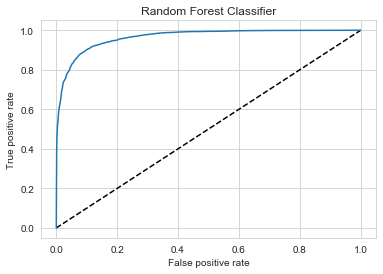

In [90]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

Observations :-

1. As the line is moving towards 1, so we can conclude that we have developed good model.

# Saving the model

In [91]:
import joblib

In [92]:
joblib.dump(rf,"rf_census_income.obj")

['rf_census_income.obj']